In [ ]:
import shutil
import os
if os.path.exists('/content/DL_Assignment2'):
  os.chdir('/content/')
  shutil.rmtree('/content/DL_Assignment2')
print(os.getcwd())

In [ ]:
!git clone https://github.com/BenjaminPhan34/DL_Assignment2

In [ ]:
os.chdir('/content/DL_Assignment2')

In [1]:
import modelHW2
from keras.datasets import mnist
import numpy as np
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


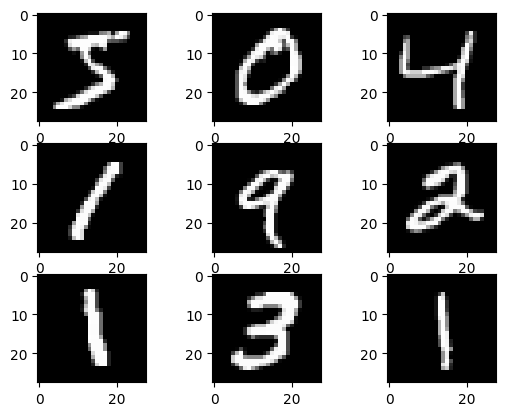

In [4]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [6]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

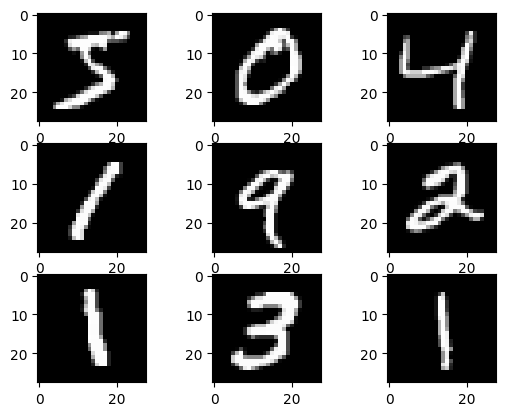

In [7]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
LR = 0.001

# DNN model

In [9]:
modelDNN = modelHW2.model_DNN(input_shape,num_classes,LR,64,32,16)

In [10]:
history = modelDNN.fit(train_images, train_labels, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


750/750 [==============================] - 9s 4ms/step - loss: 0.4171 - accuracy: 0.8800 - val_loss: 0.1896 - val_accuracy: 0.9428
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1811 - accuracy: 0.9457 - val_loss: 0.1576 - val_accuracy: 0.9534
Epoch 3/10
750/750 [==============================] - 3s 5ms/step - loss: 0.1487 - accuracy: 0.9557 - val_loss: 0.1413 - val_accuracy: 0.9578
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1329 - accuracy: 0.9596 - val_loss: 0.1370 - val_accuracy: 0.9595
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1212 - accuracy: 0.9624 - val_loss: 0.1332 - val_accuracy: 0.9615
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1142 - accuracy: 0.9653 - val_loss: 0.1291 - val_accuracy: 0.9633
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1082 - accuracy: 0.9665 - val_loss: 0.1278 - val_accuracy: 0.9634
Epoch 8/10
750/75

In [11]:
modelDNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 64)            1856      
                                                                 
 dense_1 (Dense)             (None, 28, 32)            2080      
                                                                 
 dense_2 (Dense)             (None, 28, 16)            528       
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                4490      
                                                                 
Total params: 8954 (34.98 KB)
Trainable params: 8954 (34.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 1s 3ms/step - loss: 0.1174 - accuracy: 0.9665
Test accuracy: 0.9664999842643738


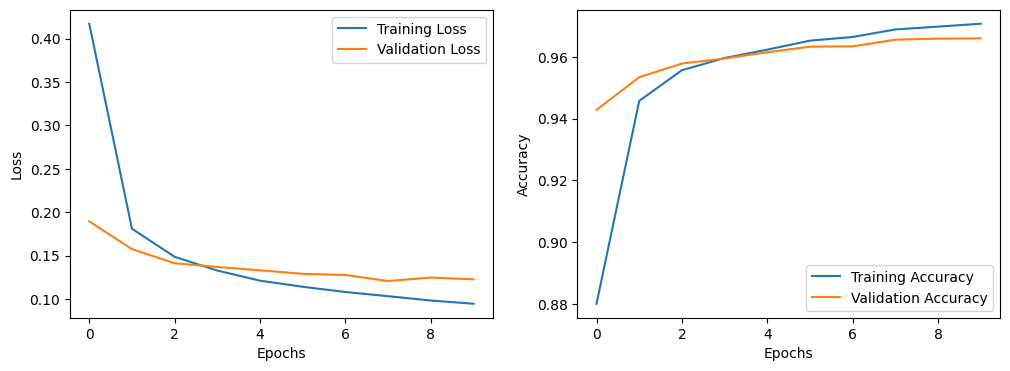

In [12]:

# Model evaluation
test_loss, test_accuracy = modelDNN.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

# Plot training history (loss and accuracy over epochs)
modelHW2.performance_visualization(history)

# ConvNet model

In [13]:
modelConvNet = modelHW2.model_ConvNet(input_shape,num_classes,LR,32,64,64)

In [14]:
modelConvNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [15]:
history = modelConvNet.fit(train_images, train_labels, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 11s 5ms/step - loss: 0.2254 - accuracy: 0.9310 - val_loss: 0.1014 - val_accuracy: 0.9675
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0600 - accuracy: 0.9813 - val_loss: 0.0570 - val_accuracy: 0.9836
Epoch 3/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0447 - val_accuracy: 0.9864
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0364 - val_accuracy: 0.9898
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0443 - val_accuracy: 0.9875
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0389 - val_accuracy: 0.9895
Epoch

313/313 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9894
Test accuracy: 0.9894000291824341


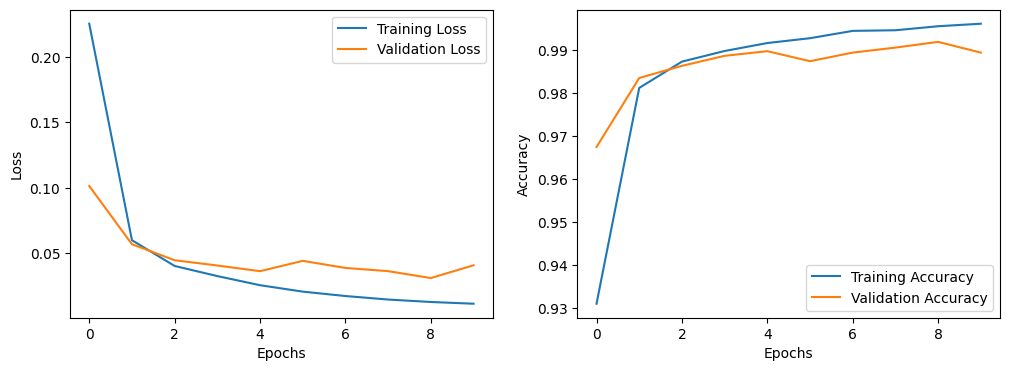

In [16]:

# Model evaluation
test_loss, test_accuracy = modelConvNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

# Plot training history (loss and accuracy over epochs)
modelHW2.performance_visualization(history)

# ResNet model

In [17]:
modelResNet = modelHW2.model_ResNet(input_shape,num_classes,3,LR)


In [18]:
modelResNet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 26, 26, 64)           640       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 26, 26, 64)           256       ['conv2d_3[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 26, 26, 64)           0         ['batch_normalization[0][0

In [19]:
history = modelResNet.fit(train_images, train_labels, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 34s 23ms/step - loss: 0.1280 - accuracy: 0.9609 - val_loss: 0.1932 - val_accuracy: 0.9447
Epoch 2/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0501 - accuracy: 0.9844 - val_loss: 0.0620 - val_accuracy: 0.9821
Epoch 3/10
750/750 [==============================] - 16s 22ms/step - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0811 - val_accuracy: 0.9774
Epoch 4/10
750/750 [==============================] - 17s 22ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0522 - val_accuracy: 0.9846
Epoch 5/10
750/750 [==============================] - 17s 22ms/step - loss: 0.0273 - accuracy: 0.9920 - val_loss: 0.0558 - val_accuracy: 0.9862
Epoch 6/10
750/750 [==============================] - 16s 22ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0294 - val_accuracy: 0.9913
Epoch 7/10
750/750 [==============================] - 16s 22ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0522 - val_accuracy:

313/313 [==============================] - 2s 7ms/step - loss: 0.0308 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


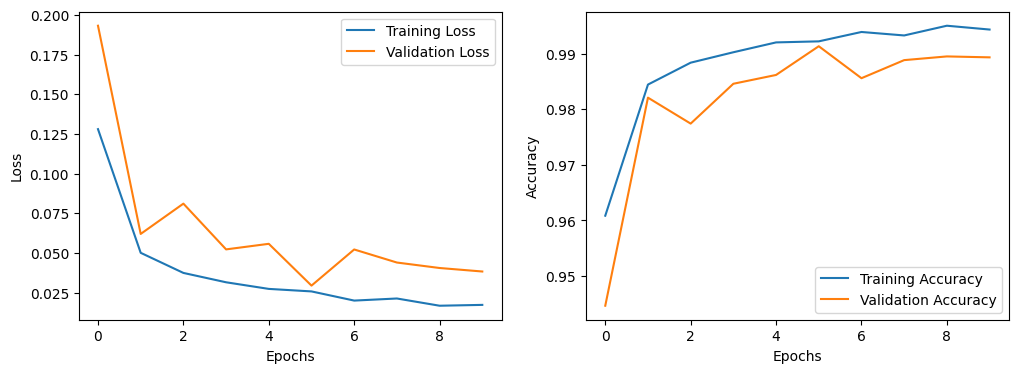

In [20]:
# Model evaluation
test_loss, test_accuracy = modelResNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

# Plot training history (loss and accuracy over epochs)
modelHW2.performance_visualization(history)

# Performance

## F1 Score

### DNN

313/313 [==============================] - 1s 2ms/step


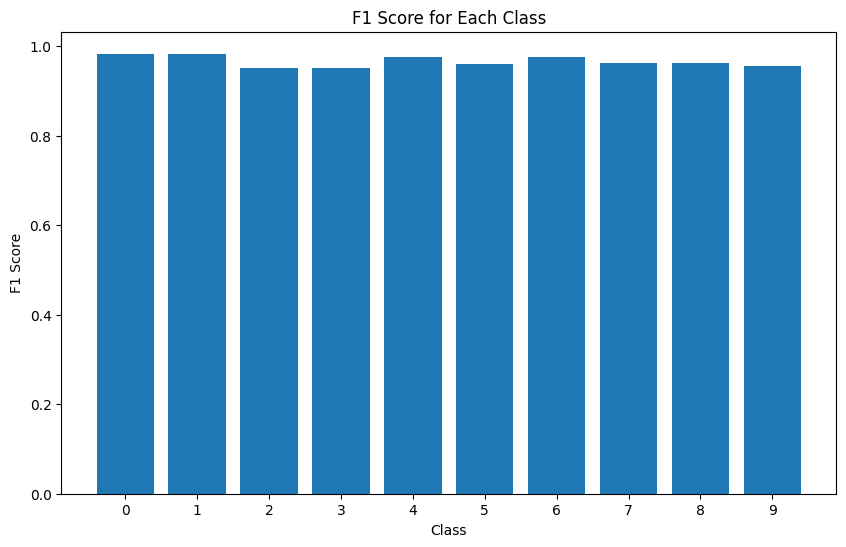

Macro-Average F1 Score: 0.9663380411497791


In [21]:
# Make predictions on the test data
y_predDNN = modelDNN.predict(test_images)  # Replace 'test_data' with your actual test data

# Convert predicted probabilities to class labels (assuming argmax for simplicity)
predicted_labelsDNN = np.argmax(y_predDNN, axis=1)

# Plot F1 score
modelHW2.F1_visualization(test_labels,predicted_labelsDNN)

### ConvNet

313/313 [==============================] - 1s 2ms/step


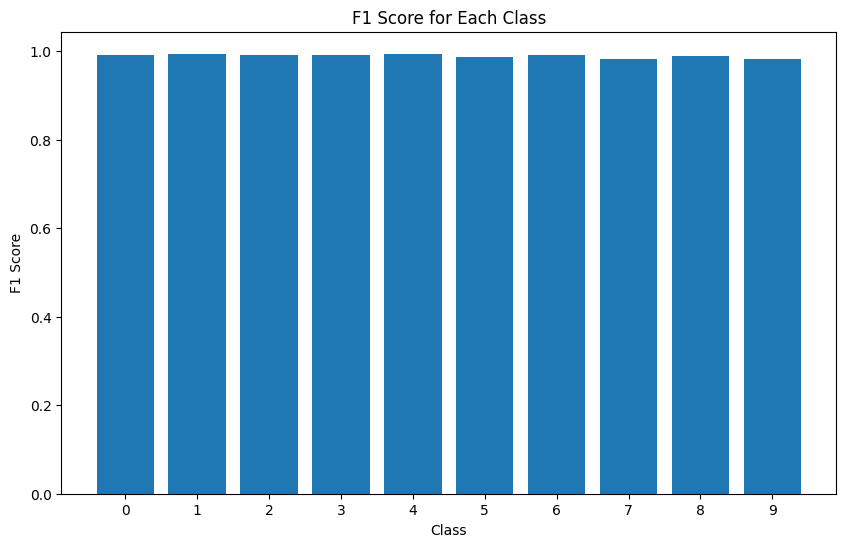

Macro-Average F1 Score: 0.989337787786347


In [22]:
# Make predictions on the test data
y_predConvNet = modelConvNet.predict(test_images)  # Replace 'test_data' with your actual test data

# Convert predicted probabilities to class labels (assuming argmax for simplicity)
predicted_labelsConvNet = np.argmax(y_predConvNet, axis=1)

# Plot F1 score
modelHW2.F1_visualization(test_labels,predicted_labelsConvNet)

### ResNet

313/313 [==============================] - 2s 5ms/step


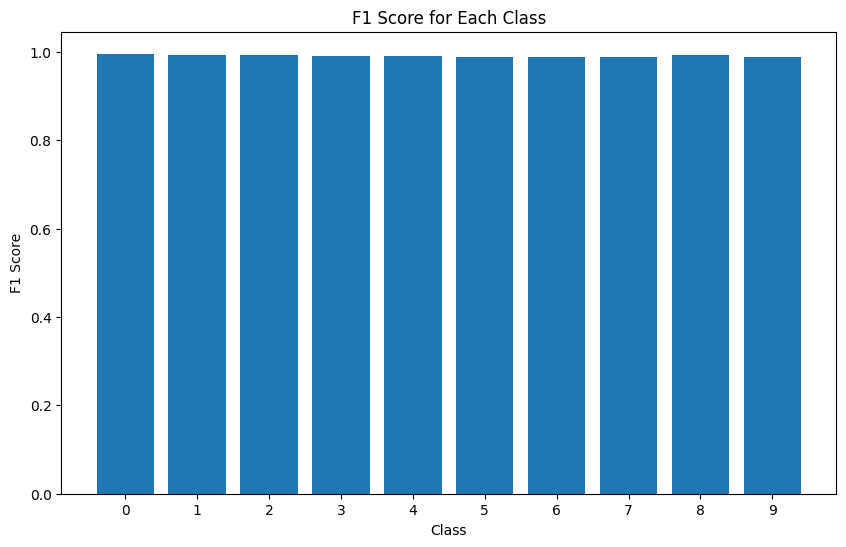

Macro-Average F1 Score: 0.9905587499565535


In [23]:
# Make predictions on the test data
y_predResNet = modelResNet.predict(test_images)  # Replace 'test_data' with your actual test data

# Convert predicted probabilities to class labels (assuming argmax for simplicity)
predicted_labelsResNet = np.argmax(y_predResNet, axis=1)

# Plot F1 score
modelHW2.F1_visualization(test_labels,predicted_labelsResNet)

## ROC AUC Score

### DNN

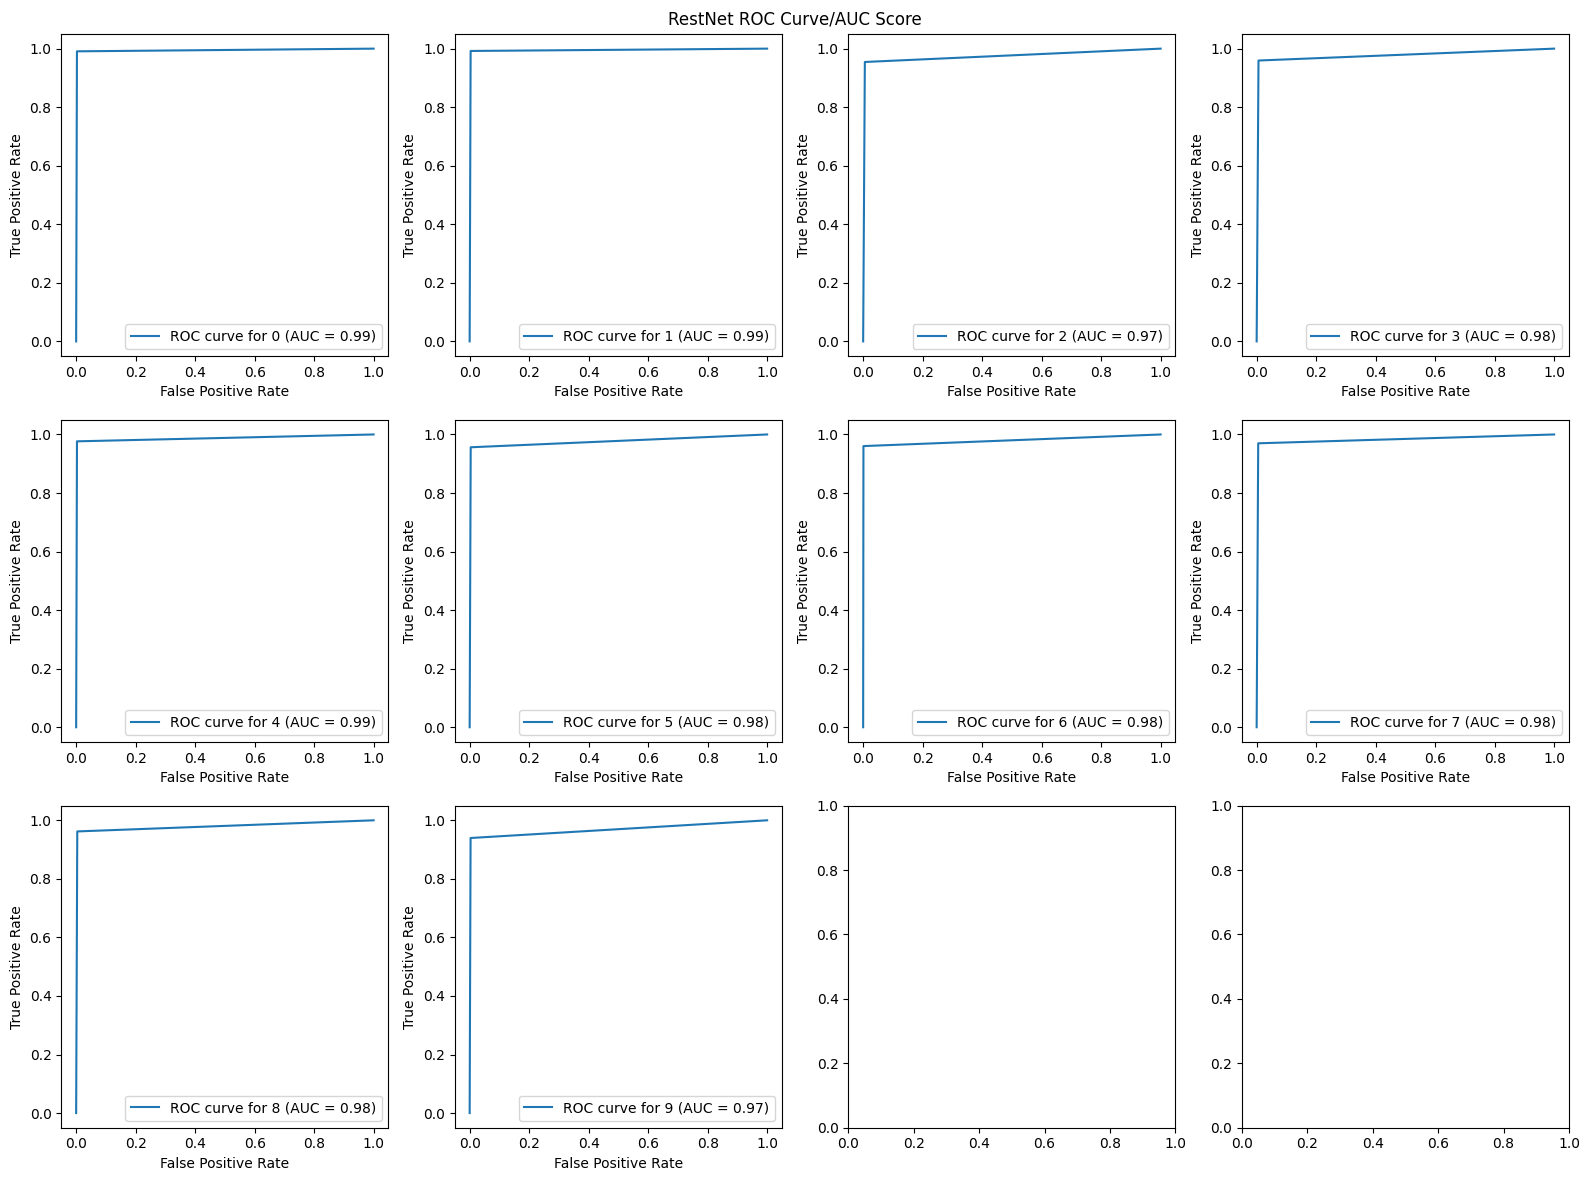

In [24]:
modelHW2.ROC_AUC_visualization(test_labels,predicted_labelsDNN)

### ConvNet

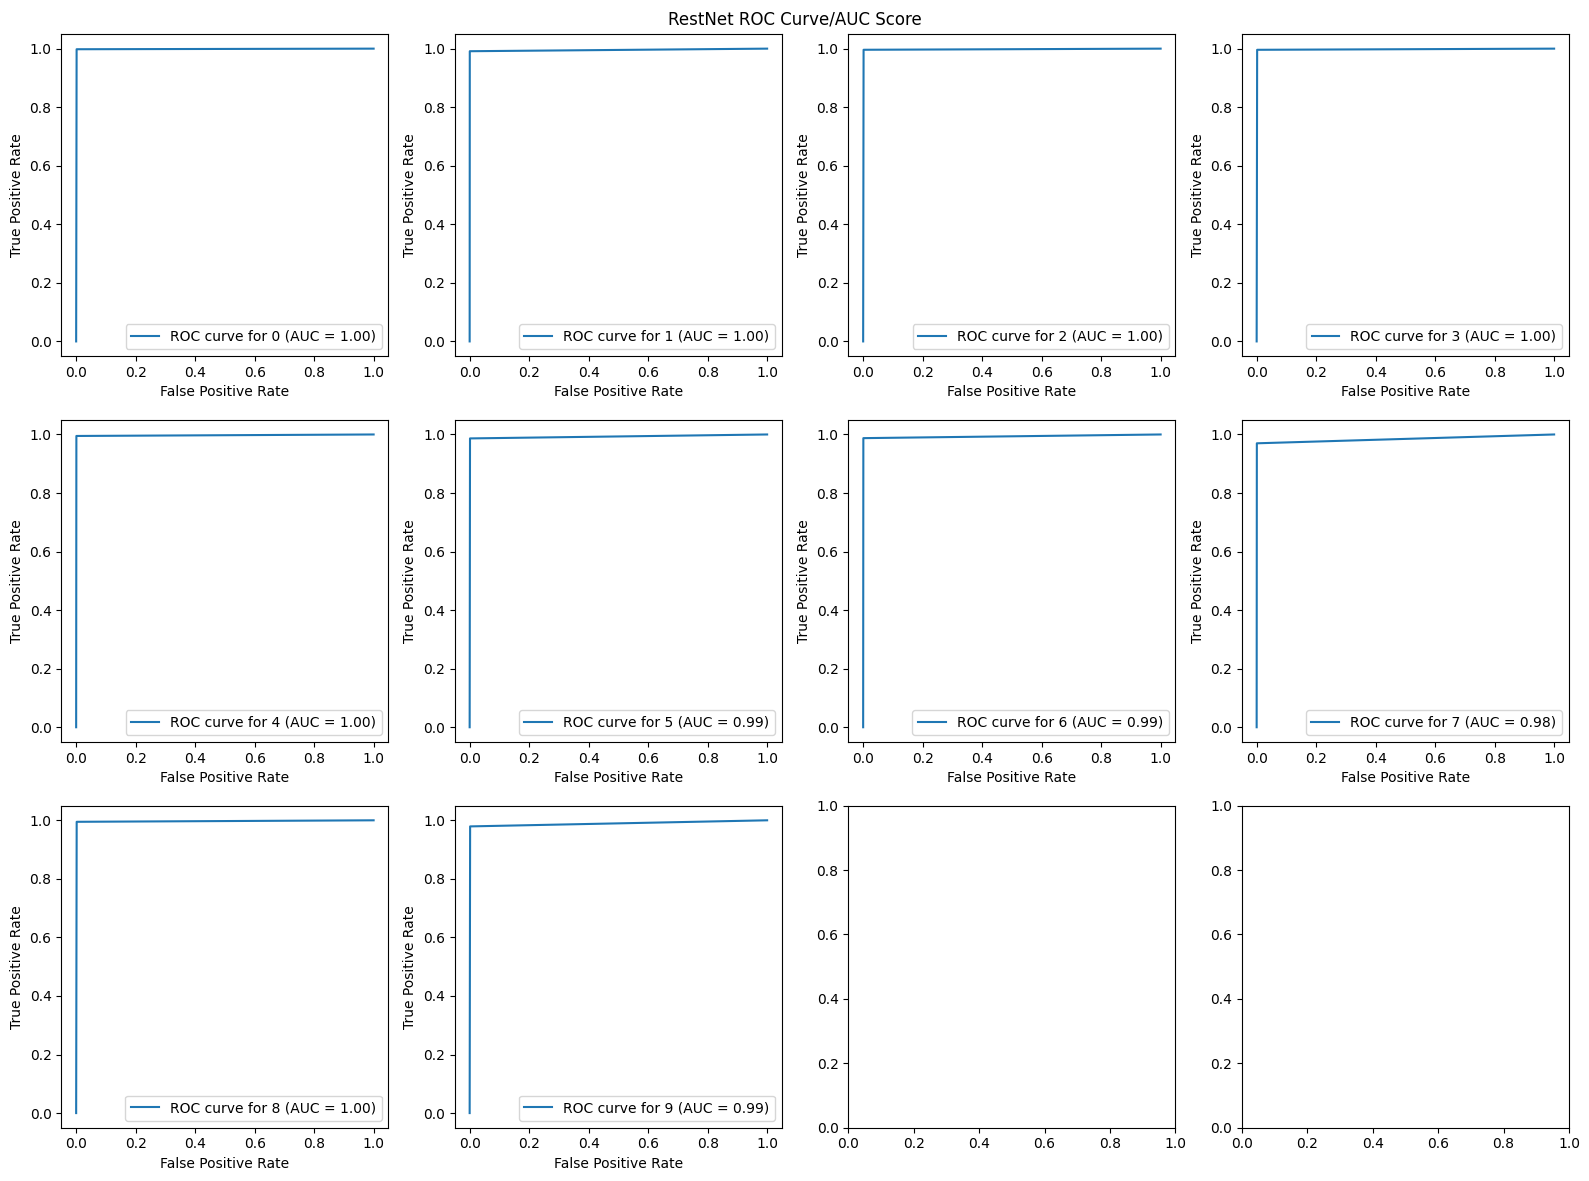

In [25]:
modelHW2.ROC_AUC_visualization(test_labels,predicted_labelsConvNet)

### ResNet

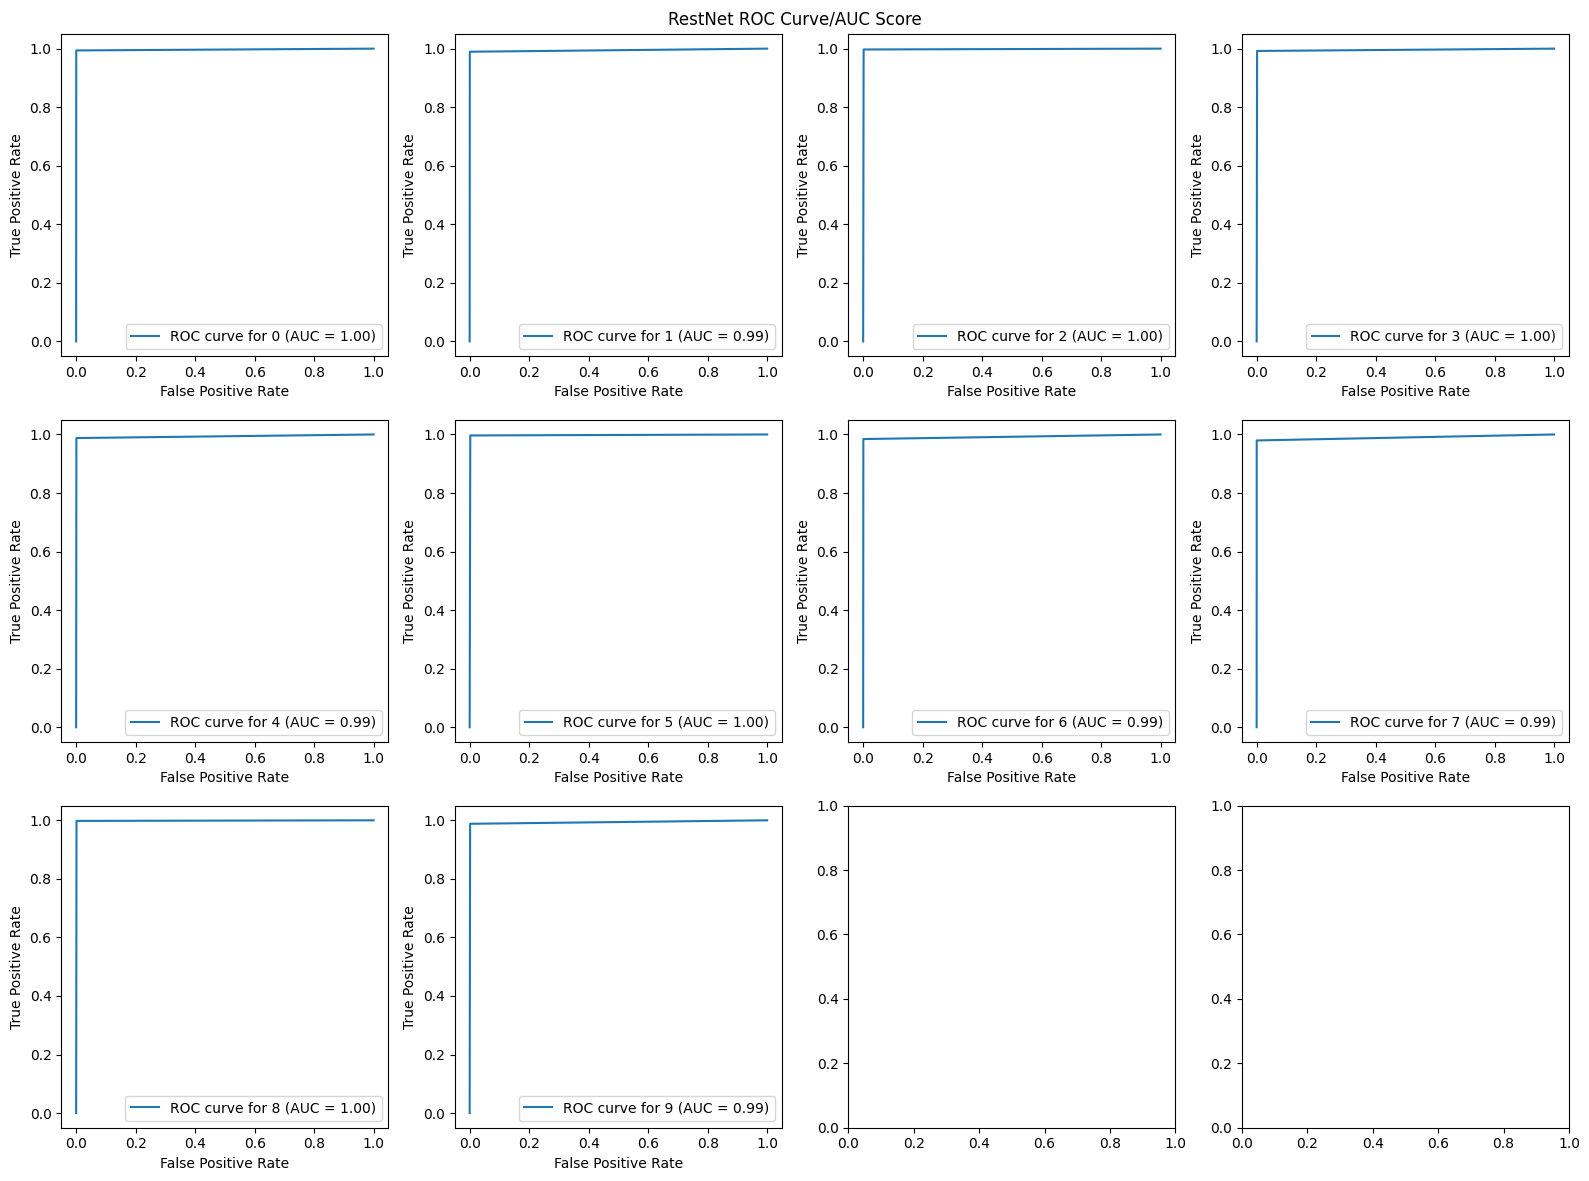

In [26]:
modelHW2.ROC_AUC_visualization(test_labels,predicted_labelsResNet)

# Feature visualization

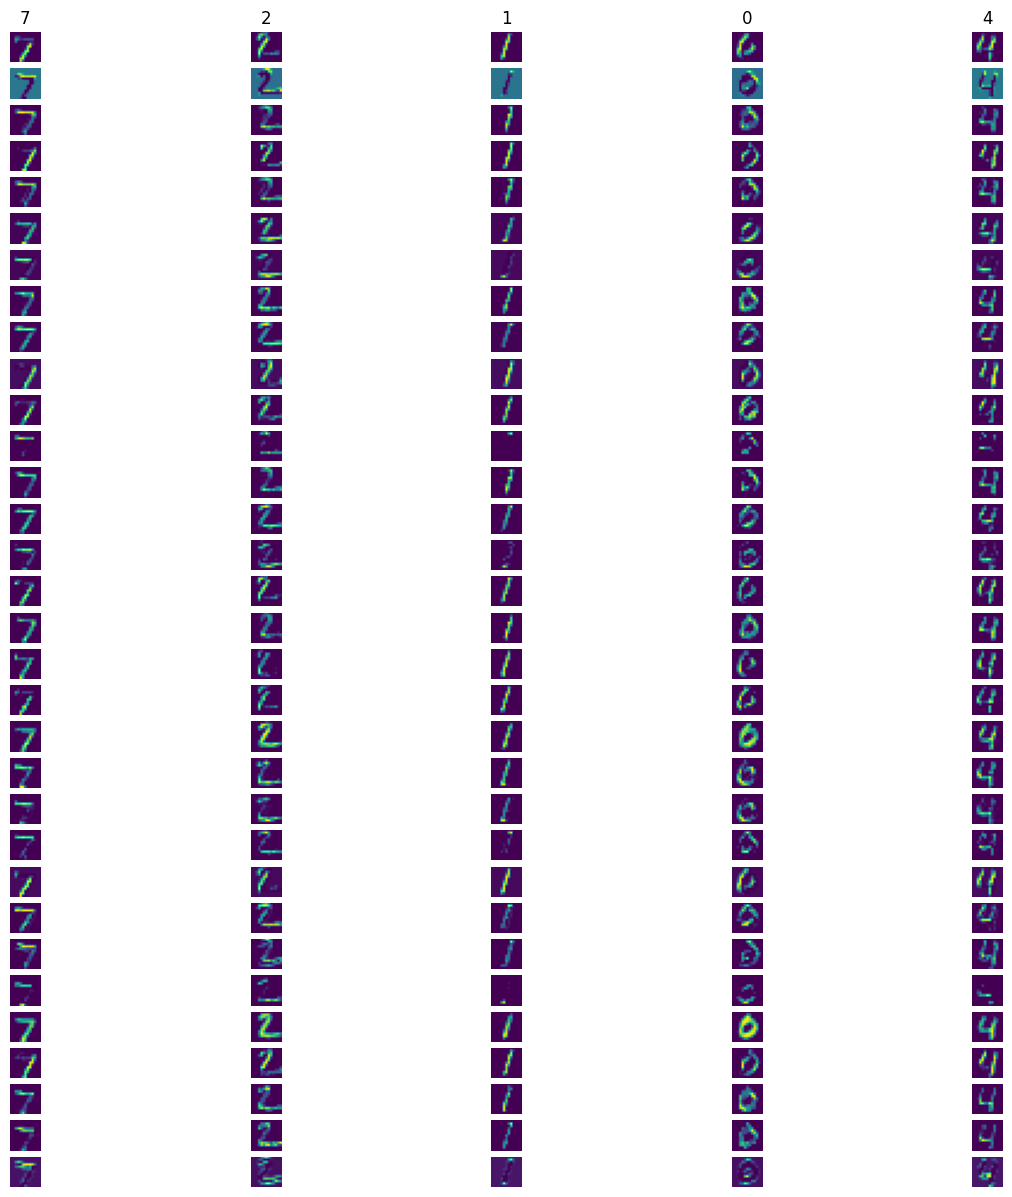

In [27]:
modelHW2.feature_visualization(modelConvNet , 1, test_images[:5], test_labels[:5])

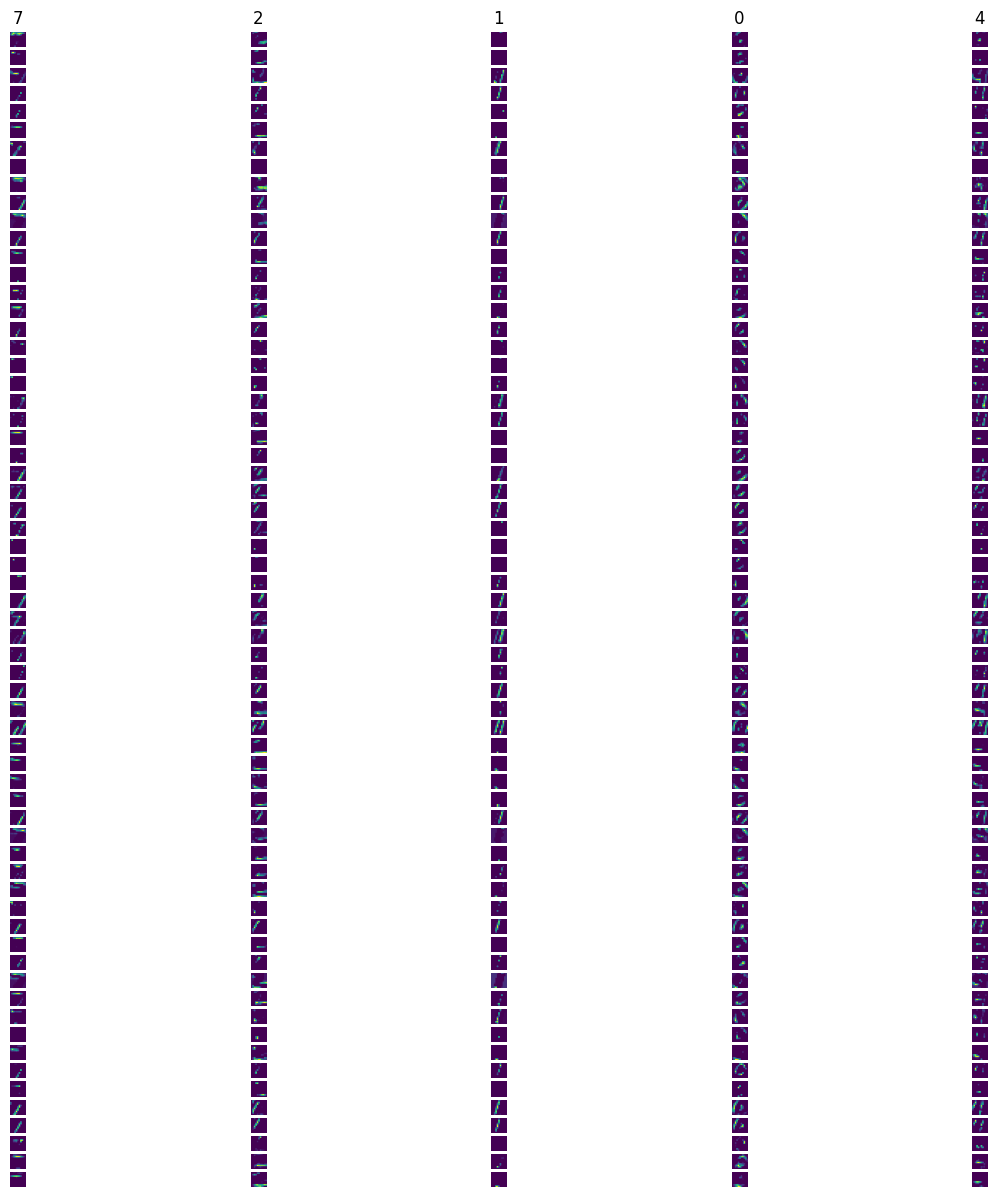

In [29]:
modelHW2.feature_visualization(modelConvNet , 2, test_images[:5], test_labels[:5])

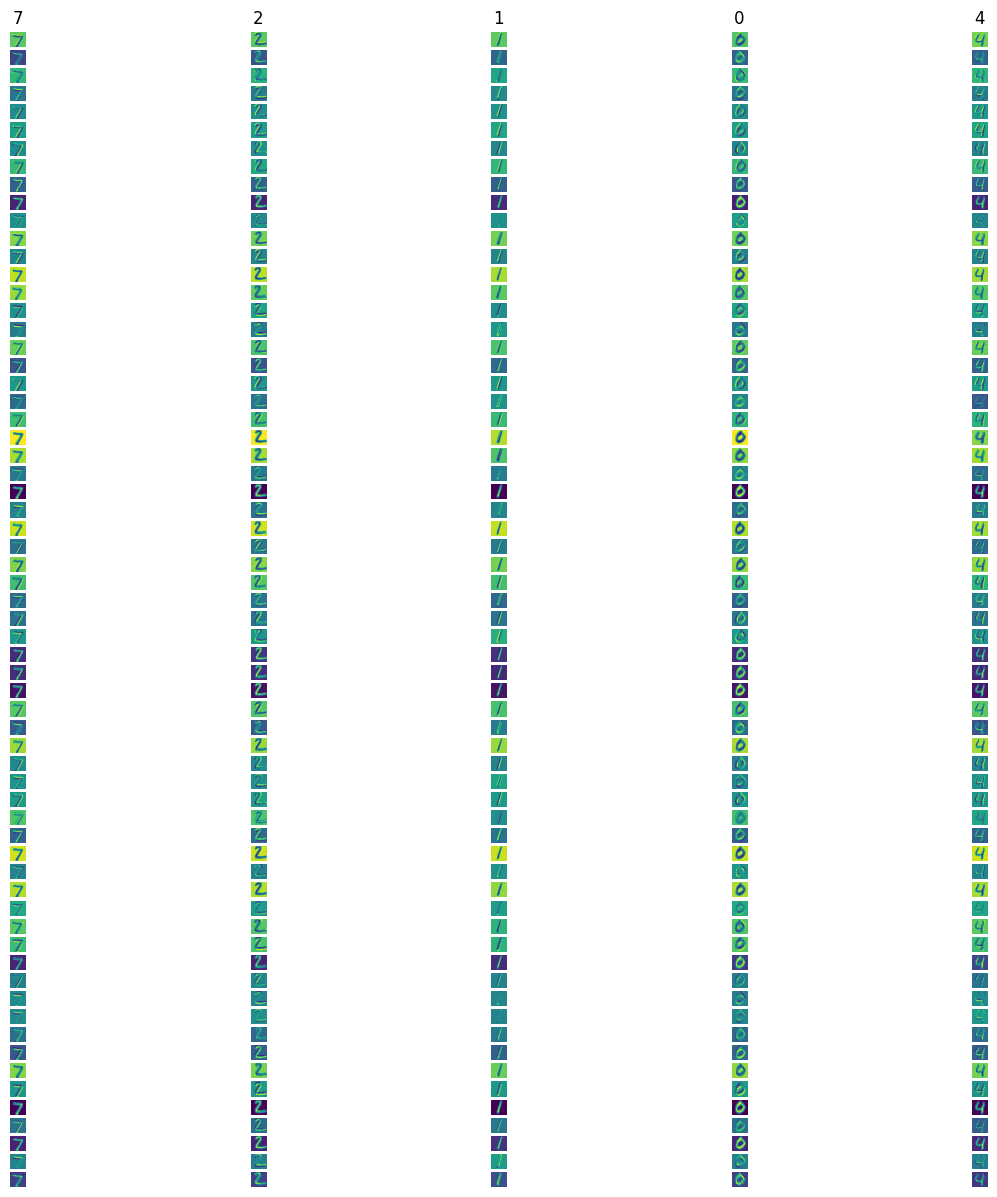

In [28]:
modelHW2.feature_visualization(modelResNet , 1, test_images[:5], test_labels[:5])

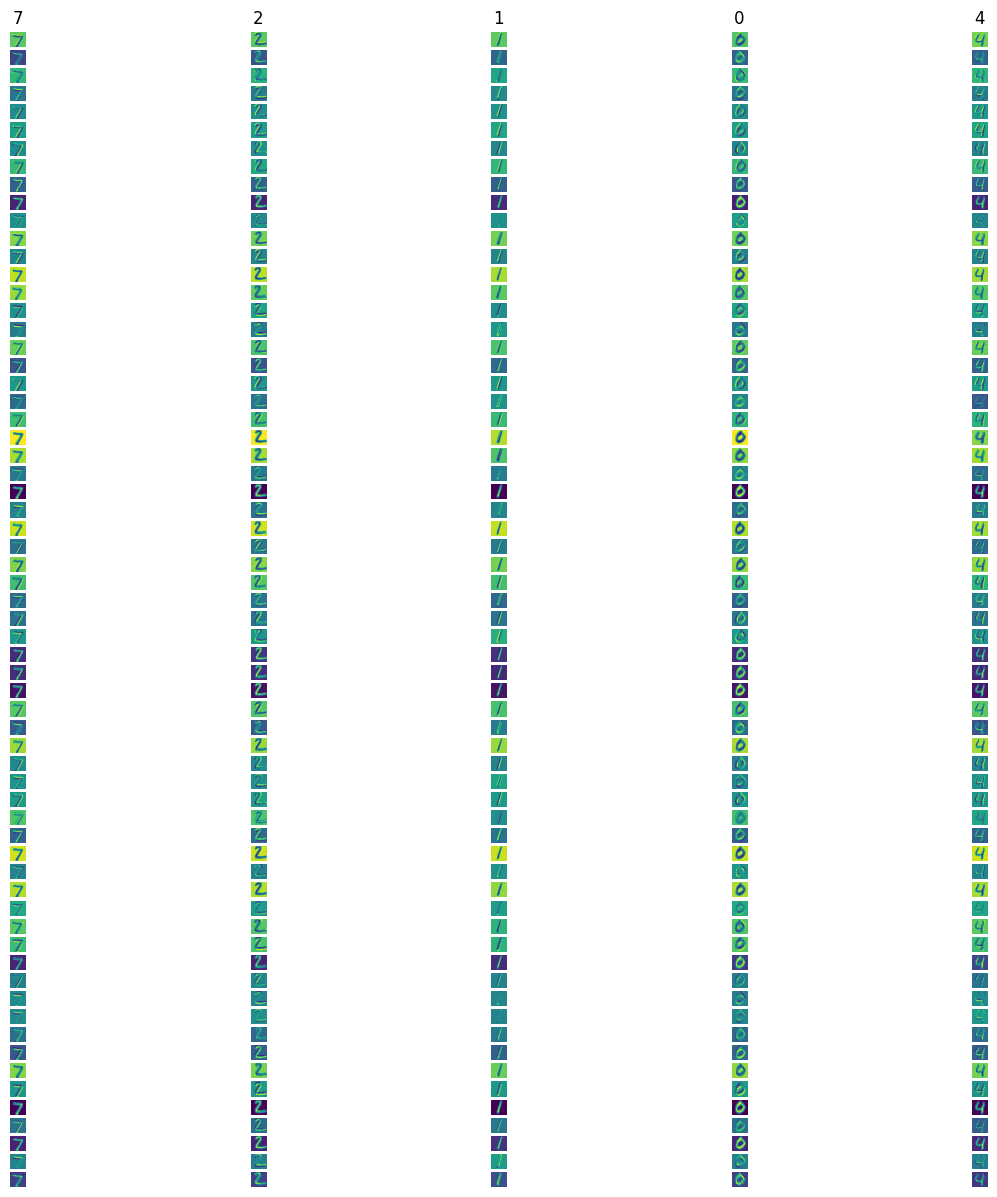

In [33]:
modelHW2.feature_visualization(modelResNet , 2, test_images[:5], test_labels[:5])